# 1. Setup Mario

In [2]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [3]:
# Import the game
import gym_super_mario_bros
import gym
# import the joypad wapper
from nes_py.wrappers import JoypadSpace
# import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [4]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [2]:
# Setup the game
env = gym_super_mario_bros.make('SuperMarioBros-v0',apply_api_compatibility=True, render_mode='human')

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [6]:
env.action_space 

Discrete(256)

256 different pattern combination, by wrapping it up with joypad space, we can simplify it down

In [3]:
# Wrap the game with the joypad wrapper
env = JoypadSpace(env, SIMPLE_MOVEMENT) # parameters: env- the game, SIMPLE_MOVEMENT- the controls

In [8]:
env.action_space 

Discrete(7)

In [9]:
#env.observation_space
print("Frame size: ", env.observation_space.shape)
print("Action size: ", env.action_space.n)

Frame size:  (240, 256, 3)
Action size:  7


In [10]:
# Getting random action
SIMPLE_MOVEMENT[env.action_space.sample()]

['right', 'A', 'B']

In [ ]:
# Create a flag - restart or not
done = True
env.reset()
# Loop through each frame in the game
for step in range (100000):
    # Start the game to begin with

    # Do random actions
    state, reward, terminated, truncated, info = env.step(env.action_space.sample())
    #action = env.action_space.sample()
    #state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # Show the game on the screen
    env.render()
    if done:
        # Start the game
        env.reset()

# Close the game
env.close()

In [ ]:
env.close()

In [ ]:
state = env.reset()
state.shape

In [ ]:
env.step(1)[3]

# 2. Preprocess the Environment

In [6]:
# Install PyTorch
!pip3 install torch torchvision torchaudio

     ---------------------------------------- 2.1/2.1 MB 12.3 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 525.3 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 598.7 kB/s eta 0:00:00
     ------------------------------------- 969.5/969.5 kB 10.2 MB/s eta 0:00:00


In [ ]:
# Reinformcement Learning Library
!pip install stable-baselines3[extra]

In [4]:
# Import Frame Stacker Wrapper nd GrayScaling Wrapper
from gym.wrappers import FrameStack, GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage, VecNormalize, VecVideoRecorder, DummyVecEnv
# Import Matplotlib
from matplotlib import pyplot as plt

In [5]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
#env = GrayScaleObservation(env, keep_dim=False)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env]) # wrap it on another array
# 5. Stack the Frames
env = VecFrameStack(env, n_stack=4, channels_order='last')

In [4]:
state

NameError: name 'state' is not defined

In [4]:
env.reset()

array([[[[  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         ...,
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140]],

        [[  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         ...,
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140]],

        [[  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         ...,
         [  0,   0,   0, 140],
         [  0,   0,   0, 140],
         [  0,   0,   0, 140]],

        ...,

        [[  0,   0,   0, 214],
         [  0,   0,   0, 124],
         [  0,   0,   0, 124],
         ...,
         [  0,   0,   0, 124],
         [  0,   0,   0, 124],
         [  0,   0,   0,   0]],

        [[  0,   0,   0, 214],
         [  0,   0,   0, 124],
         [  0,   0,   0, 124],
         ...,
         [  0,   0,   0, 124],
         [  0,   0,   0,   0],
         

In [5]:
# Test out the grayscaled
state = env.reset()
state.shape

(1, 240, 256, 4)

In [6]:
#state, reward, terminated, truncated, info  = env.step([env.action_space.sample()])
state, reward, terminated, info  = env.step([env.action_space.sample()])
#done = terminated or truncated

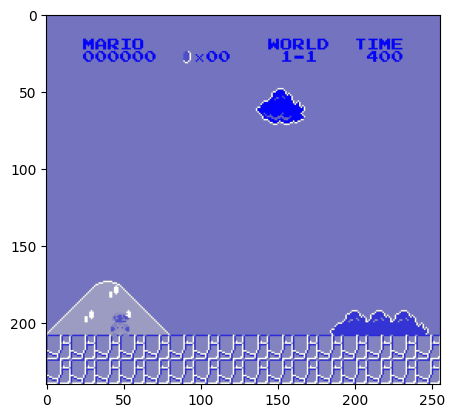

In [7]:
# Using matplotlib to show the game frame
plt.imshow(state[0])

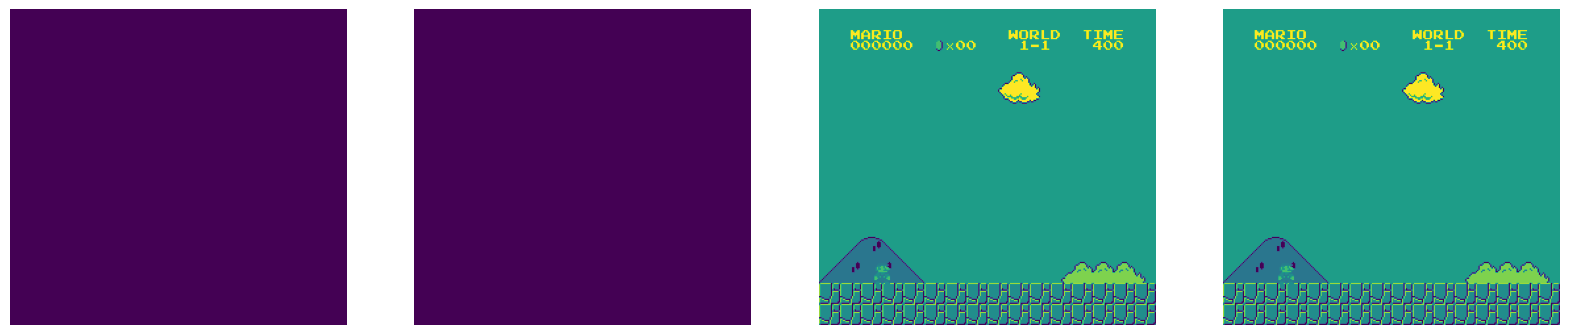

In [8]:
plt.figure(figsize=(20, 16))
for idx in range(state.shape[3]):
    #plt.subplot(2, 2, idx+1)
    #plt.imshow(state[0, :, :, idx])#, cmap='gray'
    #or
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
    plt.axis('off')
plt.show()

# 3. Train the RL Model

In [2]:
# Import os for file path management
import os
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [18]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):    
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        
        return True

In [11]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [19]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [20]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [21]:
# Train the AI mode, this is where the AI model starts to Learn
  # total_timesteps: the number of frames to train the AI model
  # callback: the callback function to save the model
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_2


c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 19  |
|    iterations      | 1   |
|    time_elapsed    | 25  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 3             |
|    iterations           | 2             |
|    time_elapsed         | 279           |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 4.7110952e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.000237     |
|    learning_rate        | 1e-06         |
|    loss                 | 311           |
|    n_updates            | 10            |
|    policy_gradient_loss | 0.000102      |
|    value_loss           | 613           |
-------------------------------------------
-----

KeyboardInterrupt: 

In [ ]:
# Manually save the model
model.save('saved_model')

# 4. Test it Out

In [6]:
# Load model
model = PPO.load('./train/best_model_200000')

In [7]:
state = env.reset()

In [13]:
# Predicting the action base from the state
SIMPLE_MOVEMENT[model.predict(state)[0][0]]

['A']

In [14]:
# Sart the game
state = env.reset()

# Loop through the game
while True:
    action, _state = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

: 